<a href="https://colab.research.google.com/github/QuantLet/Tukey/blob/master/TukeyQQ/TukeyQQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

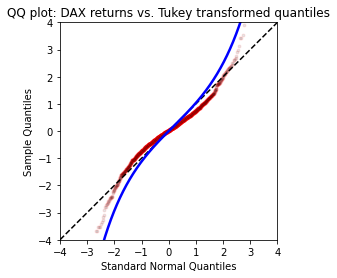

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

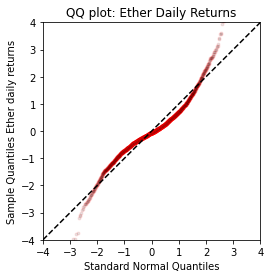

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

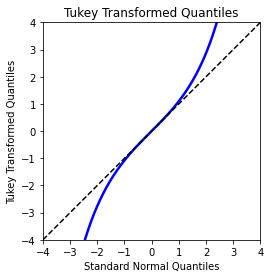

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pylab
import pandas as pd
from scipy.stats import norm
from google.colab import files
from google.colab import drive 
from sklearn.preprocessing import StandardScaler

x = np.linspace(-3,3, 2000)
g1=-0.08
h1=0.15
T1=(1/g1)*np.exp(h1*x**2/2)*(np.exp(g1*x)-1)

#DAX returns 

#Read data either locally or from gdrive
dax = pd.read_csv("https://raw.githubusercontent.com/QuantLet/Tukey/master/dax8Y.csv", delimiter = ";")
dax.dropna(inplace = True)

dax = dax[dax["RET"] != "C"]
dax["RET"] = [float(x) for x in dax["RET"]]
mu = np.mean(dax["RET"])
std = np.std(dax["RET"])

dax["RET_s"] =  (dax["RET"] - mu) / std

pp = sm.ProbPlot(dax["RET_s"], fit=True)
qq = pp.qqplot(marker='.', markerfacecolor='k', markeredgecolor='r', alpha=0.1)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.plot(x, T1, color = "blue", linewidth = 2.5)
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.xticks(range(-4, 5, 1))
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Standard Normal Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ plot: DAX returns vs. Tukey transformed quantiles')
plt.savefig("dax_vs_tukey.png")
files.download("dax_vs_tukey.png") 
plt.show()

x = np.linspace(-4,4, 2000)
g1=0.02
h1=0.17
T1=(1/g1)*np.exp(h1*x**2/2)*(np.exp(g1*x)-1)


#Crypto returns 

ether_data = pd.read_csv("https://raw.githubusercontent.com/QuantLet/Tukey/master/etherprice.csv")

ether_data["daily_returns"] = ether_data["Value"].pct_change(1) + 1
#Drop NaNs and infinite values
ether_data.replace([np.inf, -np.inf], np.nan, inplace=True)
ether_data.dropna(inplace = True)
mu = np.mean(ether_data["daily_returns"])
std = np.std(ether_data["daily_returns"])

ether_data["daily_returns_s"] = (ether_data["daily_returns"] - mu) / std

pp = sm.ProbPlot(ether_data["daily_returns_s"], fit=True)
qq = pp.qqplot(marker='.', markerfacecolor='k', markeredgecolor='r', alpha=0.1)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.xticks(range(-4, 5, 1))
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Standard Normal Quantiles')
plt.ylabel('Sample Quantiles Ether daily returns')
plt.title('QQ plot: Ether Daily Returns')
plt.savefig("ether_return.png")
files.download("ether_return.png")
plt.show() 

plt.plot(x, T1, color = "blue", linewidth = 2.5)
plt.plot(x,x, linestyle = "dashed", color = "black")
plt.xlabel("Standard Normal Quantiles")
plt.ylabel("Tukey Transformed Quantiles")
plt.title("Tukey Transformed Quantiles")
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.xticks(range(-4, 5, 1))
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("etherestimate.png")
files.download("etherestimate.png") 
plt.show()

